# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [7]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')



### Understanding the structure of the data

In [8]:
# give google colab access to google drive
from google.colab import drive
drive.mount('/content/drive')

# read the data
df = pd.read_csv('/content/drive/MyDrive/mygreatlearning mit course/week 2 project/foodhub_order.csv')
# returns the first 5 rows
df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Write your code here
rows = len(df.axes[0])   #access rows because when axis=0 it implies row
col = len(df.axes[1])  ##access cols because when axis=1 it implies columns

print("There are", rows, "rows and", col, "columns in the dataframe foodhub_order.")


There are 1898 rows and 9 columns in the dataframe foodhub_order.


#### Observations:

We can notice that there are 1,898 rows and 9 columns in the dataframe foodhub_order. We can confirm the columns by looking at the previous section of code where we printed the head, aka the first 5 rows, where we see that there are indeed 9 columns. We confirmed the rows and columns by calling df.info which states "[1898 rows x 9 columns]" confirming our findings.





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Columns "order_id", "customer_id", "food_preparation_time", and "delivery_time" are integer types.

Columns "restaurant_name", "cuisine_type", "day_of_the_week", and "rating" are object types.

Column "cost_of_the_order" is float type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# Write your code here
df.isna().sum()  #check in the data fram if there are any null values and sum them.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing or null values in this dataframe. After looking closely there are values that are "not given", however that does not mean that they are missing.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Write your code here
df['food_preparation_time'].describe().T  #emphasize for "food_preparation_time" within df to explicitly give us a statistical summary of just that.

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:

Assuming the unit of measure is minutes, it takes minimum 20 minutes, an average of 27.372 minutes or 27 minutes and 23 seconds, and maximum 35 minutes to prepare food once an order is placed.


### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Write the code here
df['rating'].value_counts() #count the values of each attribute within "rating".

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

By analyzing the output of our code we can see that 736 "ratings" are "Not Given".


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [14]:
# We have already imported the necessary libraries for data visualization in the first part when we imported pandas.
# a command to tell Python to actually display the graphs
%matplotlib inline


**Observation**: We know by looking at the raw data that "customer_id", "order_id", "restaurant_name" are all columns with many unique variables. We confirm it in the following code. Each individual order is emphasized with a unique ID to compare the intersectional data of "cost_of_the_order","cuisine_type", "day_of_the_week", "rating", "food_preparation_time", and "delivery_time" which all have common values.   

###order_id

In [15]:
df['order_id'].nunique()

1898

**Observation:** Too many unique values.

###customer_id


In [16]:
df['customer_id'].nunique()

1200

**Observation:** Too many unique values.

###restaurant_name

In [17]:
df['restaurant_name'].nunique()

178

**Observation:** Too many unique values, especially with restaurant names. There is no numeric value so it will be hard to visualize other than the fact that there are 178 different restaurants amongst the whole data set of 1,898 orders.

###cuisine_type

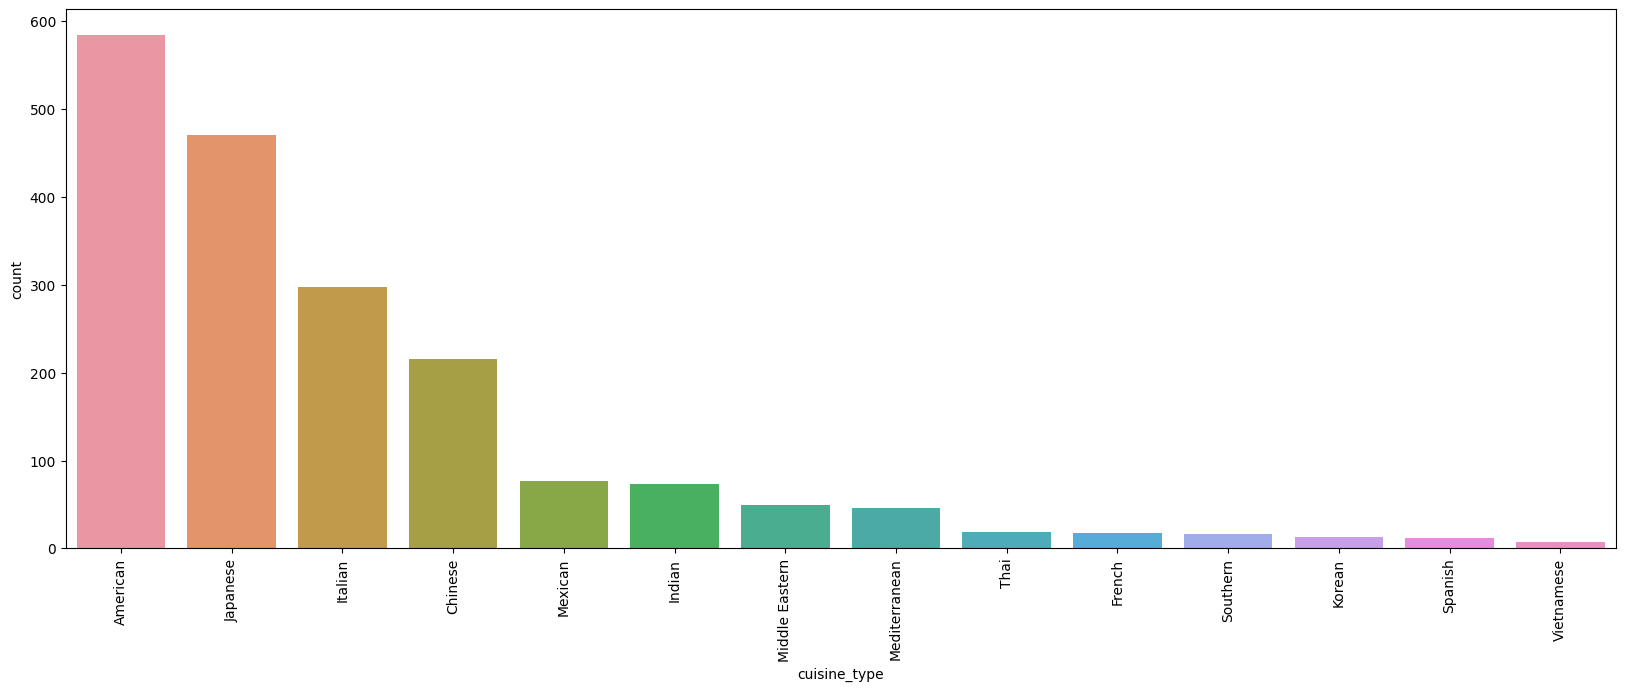

In [18]:
#Check the cuisine type with a seaborn countplot
plt.figure(figsize=(20,7)) #space for the plot
sns.countplot(data=df, x='cuisine_type', order = df['cuisine_type'].value_counts().index) #makes the plot in descending order
plt.xticks(rotation=90) #change x-axis to vertical so that the text is easier to read
plt.show() # this will ensure that the plot is displayed without the text

**Observation:** By making a descending seaborn countplot we can make observations about the cuisine type. In this dataset, we can say that American, Japanese, and Italian cuisines are more popular than Korean, Spanish, and Vietnamese cuisines. Visually we can see the popularity with the count on the y-axis and the descending order also allows us to see the popularity in order.

###cost_of_the_order
There are a lot of values so we can do a seaborn boxplot to visualize the statistical distribution of the numerical data within this column. We can check for outliers, minimum, median, maximum, and Q1 & Q


<Axes: xlabel='cost_of_the_order'>

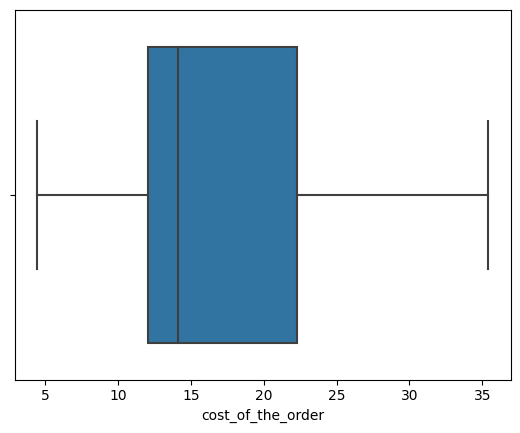

In [19]:
#a boxplot with seaborn
sns.boxplot(data=df, x='cost_of_the_order')

**Observation:** Assuming the unit of measure is dollars, we can infer with this visualization that the median cost of the food ordered,is around \$14. The minimum is around \$4, the maximum is about \$35. Q1 or 25th percentile of the numerically ordered data is \$12 and Q3 or the 75th percentile is about \$22. There are no outliers meaning none of the food ordered was extremely expensive or dirt cheap, maybe even free. They all are within the range of \$4-\$35.

This plot is also positively skewed, or right skewed through observation.

We can double check with the following code displaying the statistical summary:

In [20]:
df['cost_of_the_order'].describe().T

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

###day_of_the_week
First we can create a visualization to check when people order food more. Do they order on the weekdays or weekends?

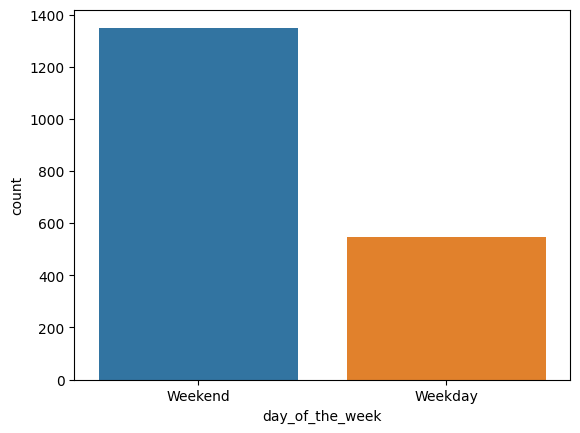

In [21]:
sns.countplot(data=df, x='day_of_the_week') #create countplot
plt.show() #display plot without text

**Observation:** We can confidently say that customers tend to order more on weekends than weekdays. We can break this down further by seeing maybe which cuisines are ordered as well.

###rating

Once again, the same situation where we can count to see the frequency of the different ratings.

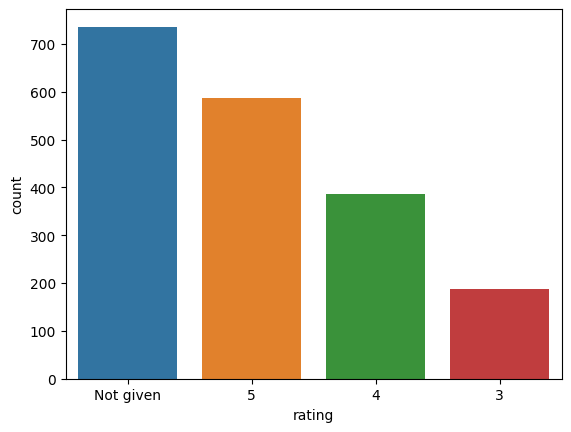

In [22]:
sns.countplot(data=df, x='rating', order = df['rating'].value_counts().index) #create countplot in descending order
plt.show() #display plot without text

**Observation:** Most of the customers did not give a rating or gave it a 5 star rating. Around 200 customers gave their restuarant a 3 star rating and out of 1,898 observations which is around 10% of the customers.

###food_preparation_time

We can show a statistical summary for this column as well through a box and whisker plot.


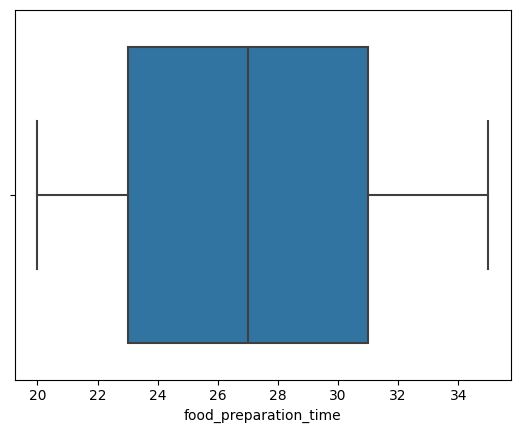

In [23]:
sns.boxplot(data=df, x='food_preparation_time') #boxplot function to display stat summ of food prep time
plt.show() #no extra wording

**Observation:** Assuming the unit of time measurement is minutes we can see with this boxplot that the fastest food was prepared was 20 minutes and the longest was 35 minutes. Within the 25th percentile it takes around 23 minutes to prepare food versus the 75th percentile where it takes around 31 minutes to prepare food. The median is 27 minutes and there was never a case where it took too long or the food was already ready after ordering. Seems like all the food is made to order.

###delivery_time
Once again we can use a boxplot for delivery time for the same reasons as food preparation time.


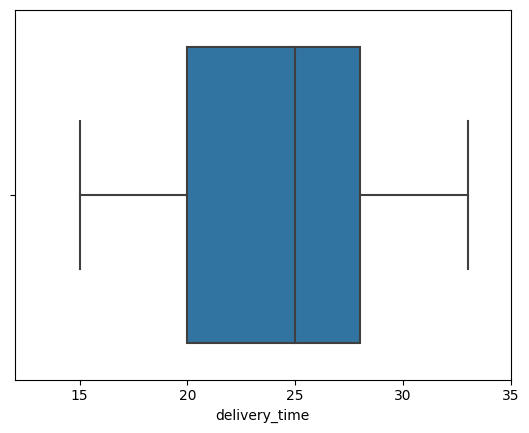

In [24]:
sns.boxplot(data=df,x='delivery_time')  # graph boxplot
plt.xlim(12,35)  #create a x-axis with no decimal values for easier comprehension
plt.show() #get rid of excess text

**Observation:** Once again, assuming the unit of time measurement is minutes we can see with this boxplot that delivery time ranges between 15 and 33 minutes. The shortest delivery time was 15 minutes and the longest was around 33 minutes. The 25th percentile of the delivered orders timed at 20 minutes while the 75th percentile timed at around 28 minutes. The median is 25 minutes and the boxplot is left skewed or negatively skewed. There are no outliers implying there were no orders that were delivered immediately after being sent out or outrageously long after it was sent out.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

We can assume each observation in this data set is an order recieved.

In [25]:
df['restaurant_name'].value_counts().head() #count the frequency of restaurants in restaurant_name and display only first 5 values to get top 5

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### **Observations**:
The top 5 restaurants in terms of order recieved are: Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

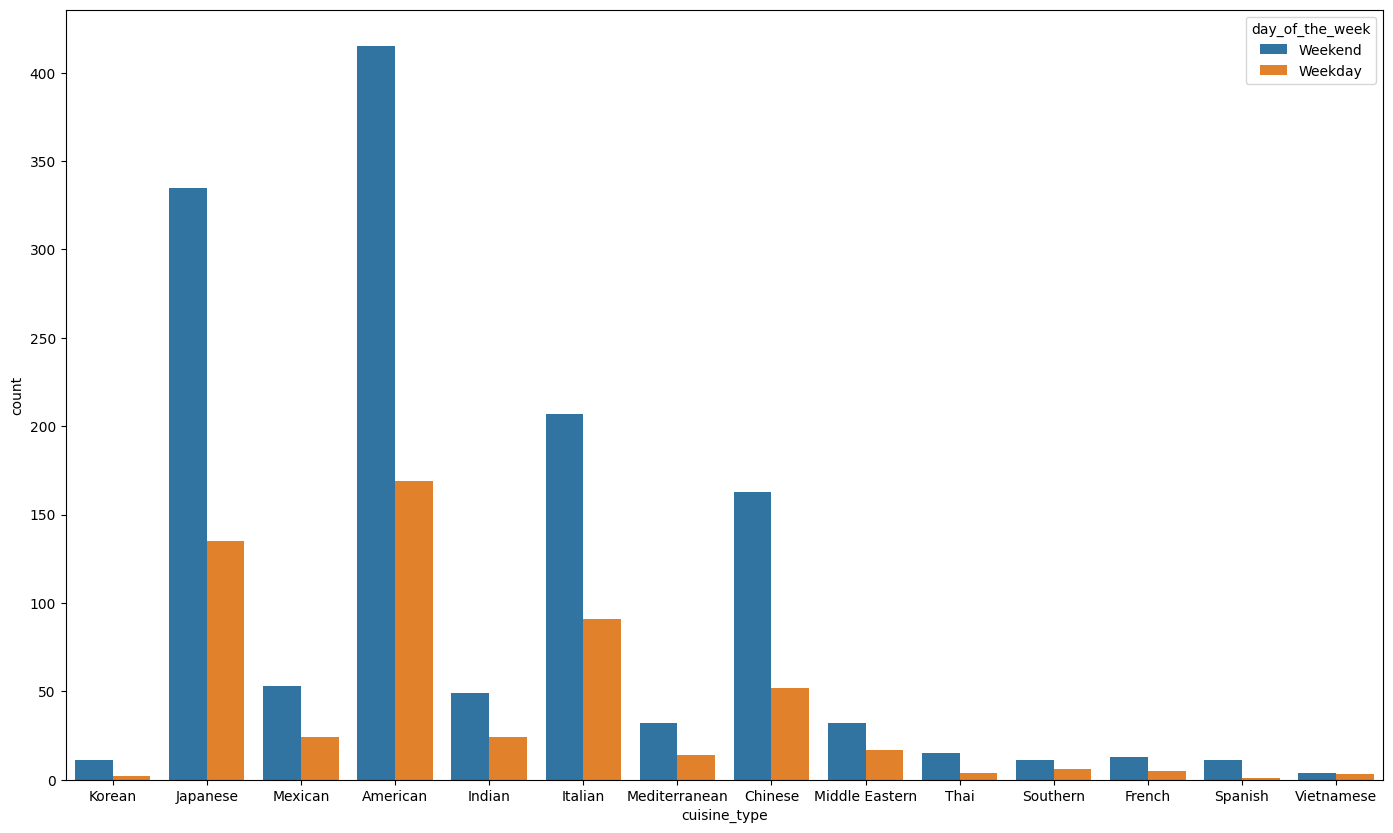

In [26]:
plt.figure(figsize=(17,10)) #creates a bigger area where graph can be displayed
sns.countplot(data=df, x='cuisine_type',hue='day_of_the_week') #count plot is divided with two variables
plt.show() #display plot without text

#### **Observations:**
The most popular cuisine is still American food, but Japanese is a close second! Same for weekdays.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
#create new variables to calculate percentage
over_20_order= len(df[df['cost_of_the_order'] > 20].value_counts()) #length of the df when cost of order is greater than 20
all_order= len(df['cost_of_the_order']) #length of whole df
perc= (over_20_order/all_order)*100 #calculate percentage

print("The percentage of the orders that cost more than 20 dollars is", round(perc, 2), "%.") #print with float up to 2 vals

The percentage of the orders that cost more than 20 dollars is 29.24 %.


**Observation:** 29.24% of the orders cost more than 20 dollars. This means that aroudn 70% of the orders are less than \$20 per meal. In this economy, if that includes the delivery fee... sounds good to me!


### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
df['delivery_time'].mean() #check the mean of delivery time

24.161749209694417

#### **Observations**:

The mean order delivery time is around 24 minutes and 10 seconds.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
df['customer_id'].value_counts().head()  #count the frequency of customer_id and display only first 5 to get top 3

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### **Observations**:
The customer ID's for the top 3 customers are: 52832 who ordered 13 times, 47440 who ordered 10 times, and 83287 who ordered 9 times. Congrats to them, they get 20% discount.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


 The variables are: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time.


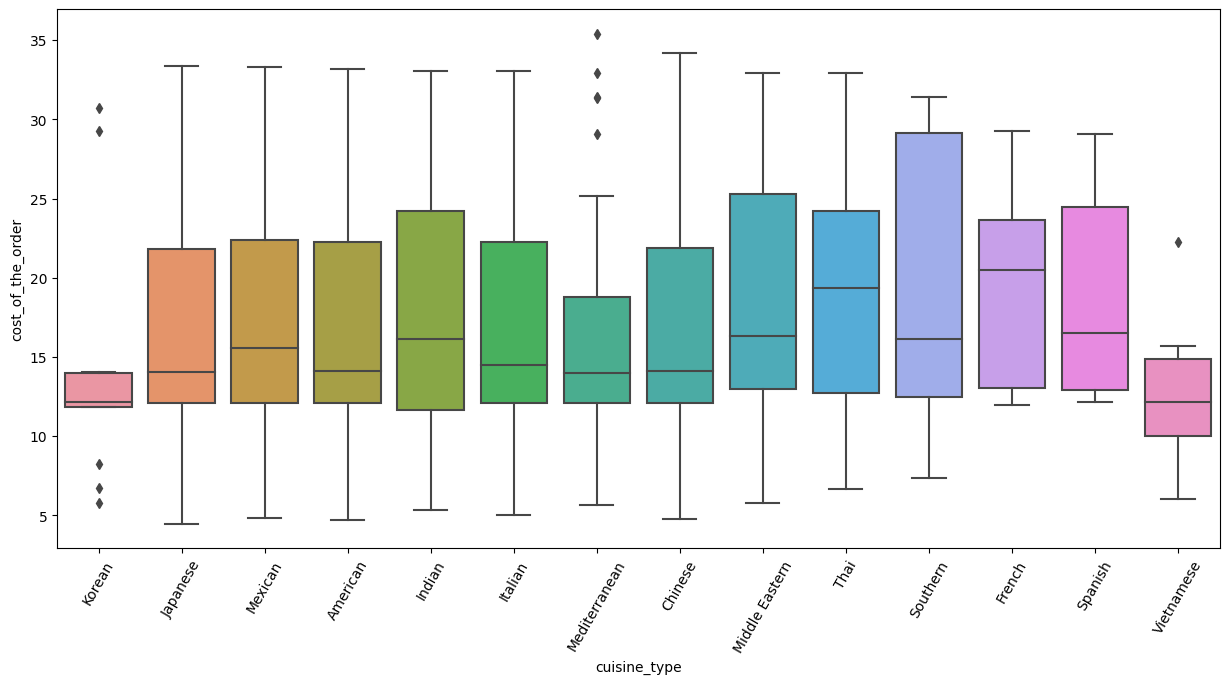

In [30]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))  #create an area where graph can be properly displayed
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)  # create boxplot
plt.xticks(rotation = 60) #rotate xaxis text vertical to make more clear
plt.show() #gets rid of text and displays only the graph


I needed some guidance with this questeion.

**Observation:** Using a boxplot across all cuisine variables we are able to compare the difference in the summary stats of each cuisine. For example, we can see the median values of the cuisines cost of order varies. We can also see the range of prices visually amongst the cuisines to infer which cuisines generally cost less or more. With this information, we can infer that Korean and Vietnamese food are generally the cheapest. There are outliers in Korean meals though with higher and lower costs.

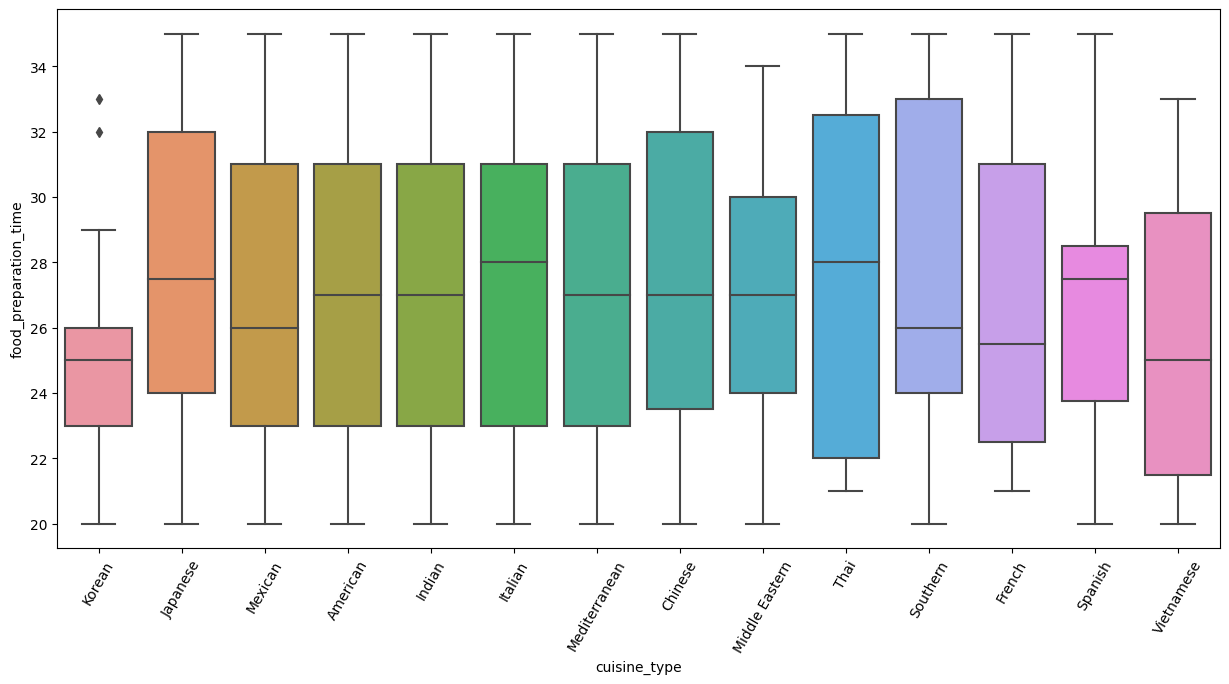

In [31]:
#comparing cuisine and food prep time
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7)) #create an area where graph can be properly displayed
sns.boxplot(x ="cuisine_type", y ="food_preparation_time" , data = df)  # create boxplot
plt.xticks(rotation = 60) #rotate xaxis text vertical to make more clear
plt.show() #gets rid of text and displays only the graph

**Observation:** Once again using the boxplot function we can see the statistical summaries of cuisine type with food preperation time. This data gives us an idea of the range of time it generally takes cuisines to prepare their meals out for delivery. It is interesting to see how Mexican, American, Indian, Italian, and Mediterranean cuisines have similar prep times. With this visualization we can infer that Korean food takes the shortest amount of time to prepare when compared side by side with all the cusines prep time. Thai food varies the most having one of the lowest and highest prep times in its range of preparation time.  

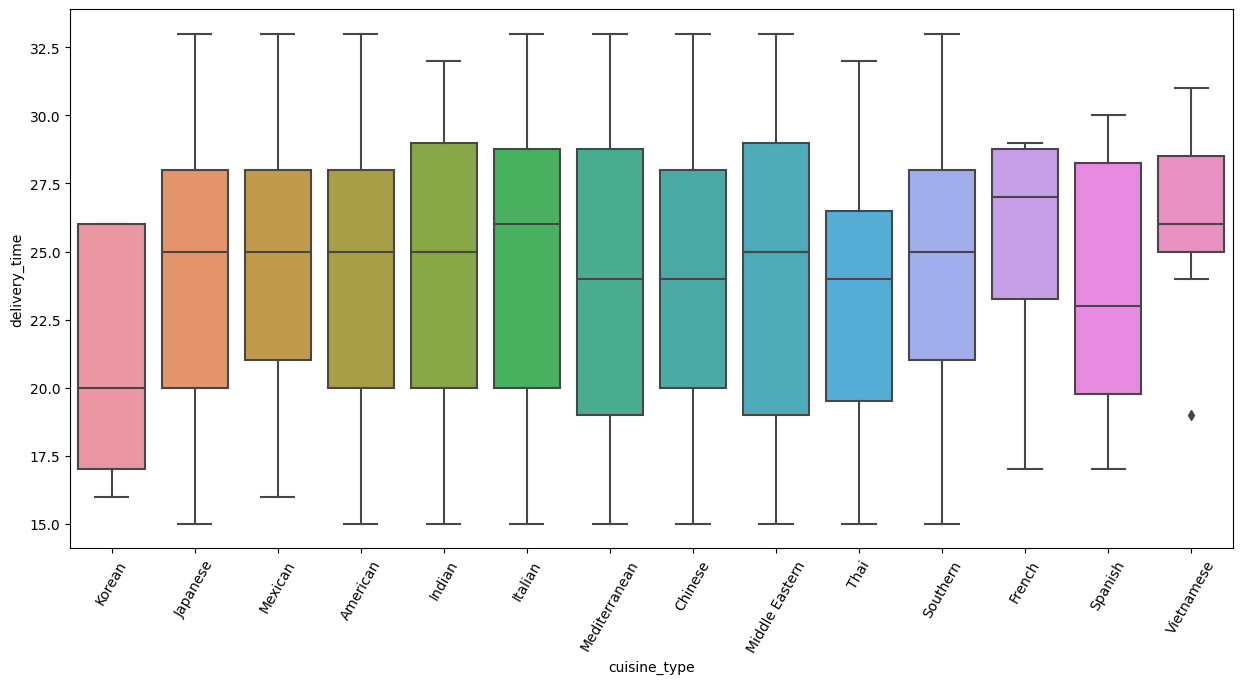

In [32]:
#comparing cuisine type and delivery time variables
plt.figure(figsize=(15,7)) #create an area where graph can be properly displayed
sns.boxplot(x ="cuisine_type", y ="delivery_time" , data = df)  # create boxplot graph
plt.xticks(rotation = 60) #rotate x-axis vertically so that text is more clearly visible
plt.show() #gets rid of text and displays only the graph

**Observation:**  Once again using the boxplot function we can see the statistical summaries of cuisine type with food delivery time. This data gives us an idea of the range of time it generally takes to deliver the food out to the city. Korean food is usually out fastest for delivery, probably because of its short perparation time and Vietnamese cuisine takes a long time to deliver. Each cuisine varies but it is safe to infer that most cuisines take a similar amount of time to deliver, other than Korean food which might come a little faster.  

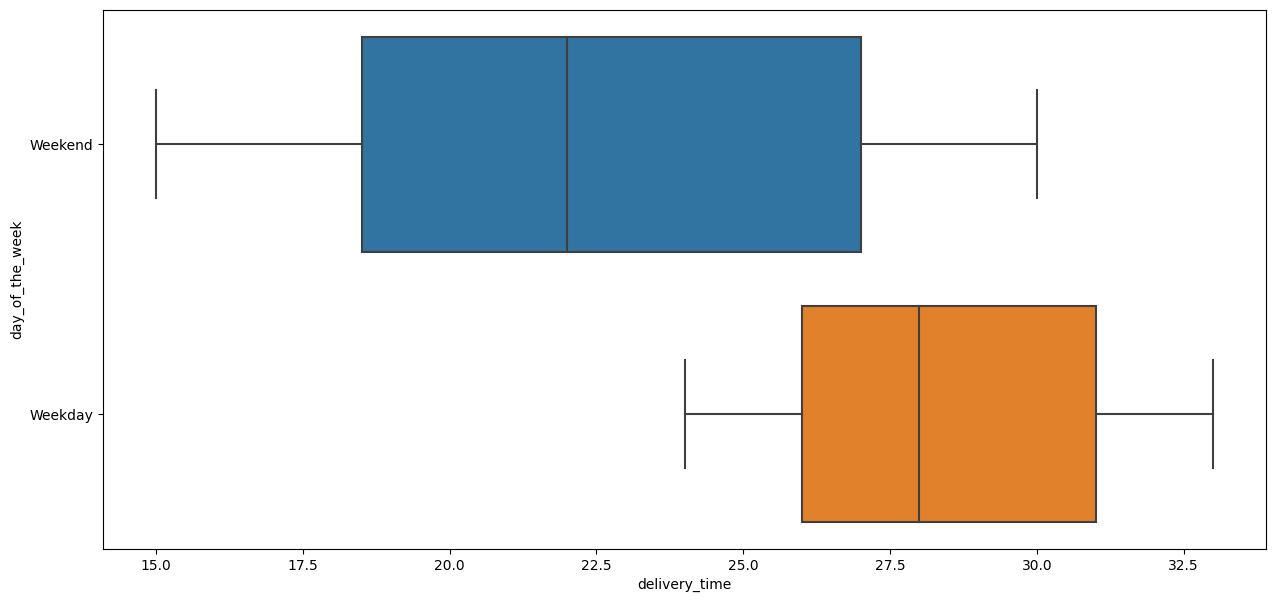

In [33]:
#  comparing day of the week and delivery time variables
plt.figure(figsize=(15,7)) #create an area where graph can be properly displayed
sns.boxplot(x ="delivery_time", y ="day_of_the_week" , data = df) #boxplot graph
plt.show() #gets rid of text and displays only the graph

**Observation:** Using a boxplot to compare the two delivery times I can see that the average delivery time is less during the weekends rather than the weekdays. By graphing it horizontally I am also able to see visually which statistical summary lies higher numerically like a number line. Seeing weekday shifted more right than weekend immediately tells me that weekday generally has a higher range of delivery time than weekends.

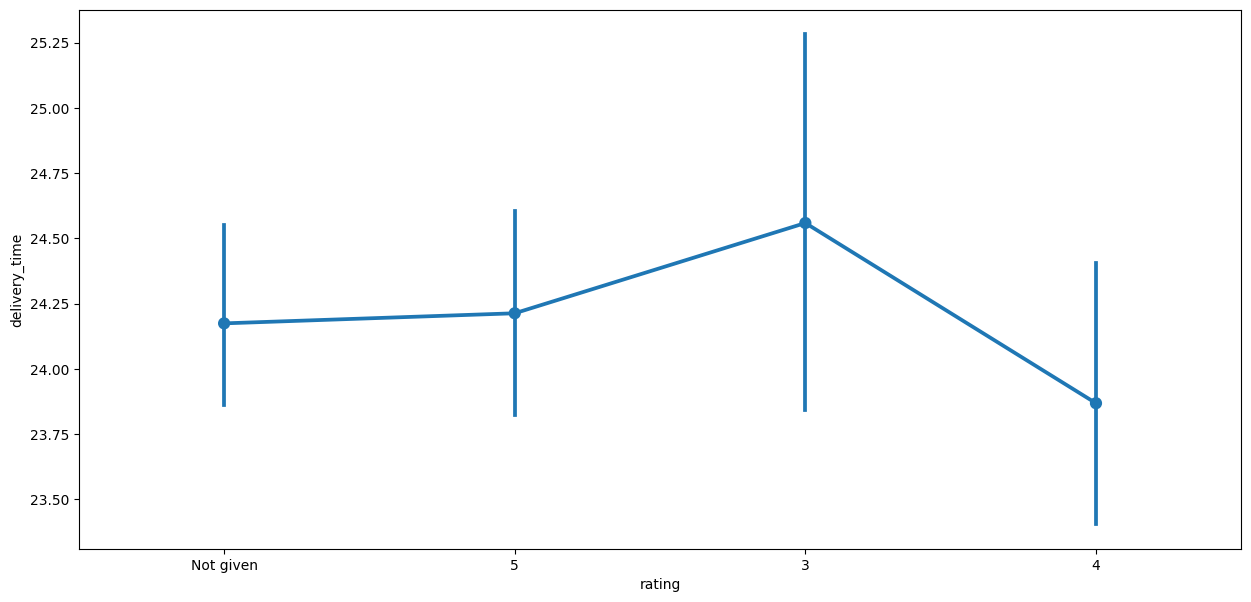

In [34]:
# comparing rating and delivery time variables
plt.figure(figsize=(15, 7)) #create an area where graph can be properly displayed
sns.pointplot(x = 'rating', y = 'delivery_time', data = df) #graph pointplot
plt.show() #gets rid of text and displays only the graph

**Observation:** By using a pointplot we can infer that the higher the average delivery time, the lower the rating seems to be. While the difference in average is not that high, by reducing delivery time the quality of the food might improve (warmer or more fresh food). We could say that by maybe decreasing delivery time the quality of the food delivered will be in better conditions therefore improving a restaurants rating.

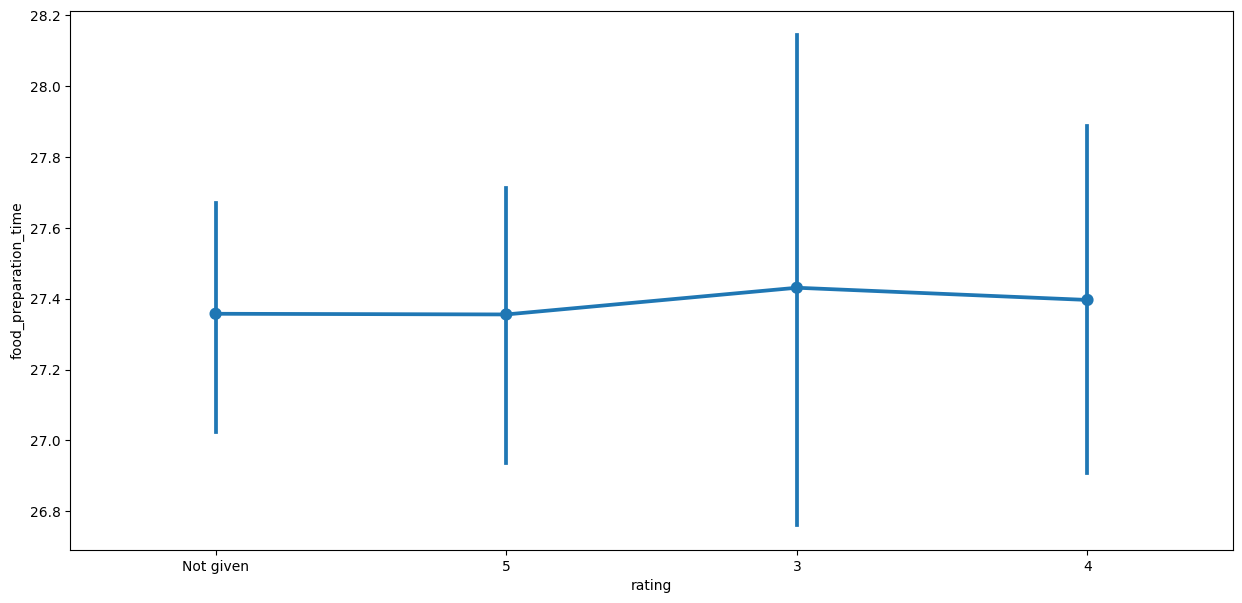

In [46]:
#comparing rating and food preparation time variables
plt.figure(figsize=(15, 7)) #create an area where graph can be properly displayed
sns.pointplot(x = 'rating', y = 'food_preparation_time', data=df) #graph pointplot
plt.show() #gets rid of text and displays only the graph

**Observation:** We can infer with the pointplot that the longer the food took to prep the lower the rating was. Once again, not much of a difference here but the pointplot implies that there is correlation. Maybe the customer got tired of waiting and had to wait too long so they gave a lower rating. We can infer that maybe decreasing prep time, even by a few seconds, might improve the orders rating.  

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [36]:
# restaurant rate > 50 count and rating must be 4 or more. We will need to do a conditional statements.
#First we know the rate column has "not given" so we need to get rid of those columns.

#first I will copy the df so I can modify it without altering the original df.

df_2 = df.copy()
df_2.drop(df[df['rating'] == 'Not given'].index, inplace = True)
#cannot make conditional statements when rating type is string so convert to int
df_2['rating'] = df_2['rating'].astype('int')
df_2.info()  # this shows us that there are now 1162 entries so 924 entries were deleted, those being the rating 'Not given'.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


 The df_2.info() shows us that there are now 1162 entries so 736 entries were deleted, those being the rating 'Not given'. Now that the observations in the data set show ratings of '3', '4', or '5' we can count the frequency of the restaurants listed to see if they reach a count of over 50.

In [37]:
#Now the observations in the df are the restaurants that have a rating of 3,4, or 5. We can count those restaurants to see if they have 50 reviews.
df_2['restaurant_name'].value_counts()


Shake Shack                    133
The Meatball Shop               84
Blue Ribbon Sushi               73
Blue Ribbon Fried Chicken       64
RedFarm Broadway                41
                              ... 
Philippe Chow                    1
Dirty Bird To Go (archived)      1
The MasalaWala                   1
Kambi Ramen House                1
'wichcraft                       1
Name: restaurant_name, Length: 156, dtype: int64

We can see that Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken have more than 50 reviews. We can create a new dataframe that will only include these restaurants.

In [38]:
# Group the restaurant names by rating count 50 or greater and save to variable name.
dfgroup=df_2.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
name = dfgroup[dfgroup['rating'] > 50]['restaurant_name']

#copy into new df so that we have a df with only restaurant names with more than 50 ratings
df_3 = df_2[df_2['restaurant_name'].isin(name)].copy()
df_3

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


With this df_3 we have successfully created a new data frame where we have the restaurants with more than 50 ratings. We can now check the average of their ratings to see if they are greater than four and reach our conclusion.

In [39]:
df_3.groupby(['restaurant_name'])['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### **Observations:**
With the final line of code we can see that all 4 restaurants with over 50 ratings have an average rating of over 4. All four of these restaurants fulfill the requirements for a promotional offer in the advertisement for the restaurants. Once again, these restaurants in order from highest rated to less are: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
# We can create a function that will charge the percentages appropriately
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
#this will generate the amount to be added to the cost of the order

#create a column that will show the additional value and also apply the function to cost of order to create this column
df['Revenue'] = df['cost_of_the_order'].apply(revenue)

#to get net revenue we need to sum the whole column
df['Revenue'].sum()

6166.303

#### **Observations**:
The net revenue is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
#create a column that adds up the times of good prepared and delivered
df['total_time'] = df['food_preparation_time'] + df ['delivery_time']

#count the number of orders whose total_time is greater than 60.
df[df['total_time']>60].count()



order_id                 200
customer_id              200
restaurant_name          200
cuisine_type             200
cost_of_the_order        200
day_of_the_week          200
rating                   200
food_preparation_time    200
delivery_time            200
Revenue                  200
total_time               200
dtype: int64

With this code we see that there are 200 orders that took over 60 minutes to prepare. We know from our previous findings that there are 1,898 total orders so with simple math we can deduce the percentage.

In [42]:
ord= 1989
val= 200
tottime = (val/ord) * 100


print(round(tottime,2), '% of the orders take more than 60 minutes to get delivered from the time ordered.')

10.06 % of the orders take more than 60 minutes to get delivered from the time ordered.


#### **Observations**:
We see that 10.06% of orders takes more than 60 minutes to get delivered from the time ordered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [43]:
#check the mean of weekdays and weekends
weekday_avg= df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_avg= df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(round(weekday_avg,2), 'minutes is the mean delivery time during the weekday and', round(weekend_avg,2), 'minutes is the mean delivery time during the weekend')

28.34 minutes is the mean delivery time during the weekday and 22.47 minutes is the mean delivery time during the weekend


#### **Observations**:
The delivery time varies in the sense that it takes longer to deliver during the weekdays than it does in the weekends. There is about a 5-6 minute difference in averages.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion and Recommendations

### Conclusions:
*  American, Japanese, and Italian cuisines are the most popular.
*  90% of the orders are out for delivery within an hour of ordering.
*  More customers order on the weekdays rather than the weekends.
*  The restaurants more commonly ordered from have higher ratings.
*  The average price of a meal is between \$12-\$22.
*  The longer it takes to prepare the meal, longer delivery time, as well as a lower average cost might contribute to a lower rating.
*  Korean and Vietnamese food takes less time to prepare compares to other cuisines. Korean food is also delivered fast but Vietnamese food has a high delivery time even though it takes less time to prepare.

### Recommendations:

There are so many things to take into consideration before making recommendations to help improve the FoodHub app. For example: why are the costs what they are? When the average cost of the meal is cheaper the rating is lower. What can be invested to help improve the quality of the experience?

We also saw that when delivery time was higher, the rating was lower. This is in control of the app. Maybe training delivery drivers to take the most conveninent and safest routes and providing them with high functioning delivery vehicles: bike, electric scooter, company delivery car. Investing into the company will allow for more revenue.
Also restricting users from ordering within a certain distance radius from the restaurant will allow delivery drivers to make local deliveries in shorter amounting of time getting the food faster and fresher from restaurant to door. For example, if you are more than a mile away from the restaurant you cannot order because it will increase delivery time which seems to lower ratings.

This is just a start to improving the app.




---